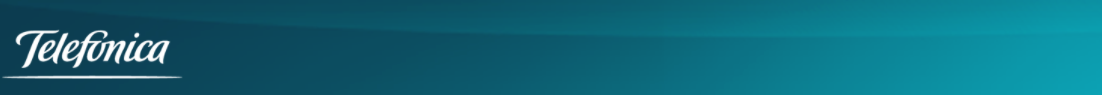

# Codigo Python para Mercado de Celulares en Colombia!

Este trabajo es presentado por **[Oscar Ayala](https://www.linkedin.com/in/oscar-ayala-b007b432/)**

Para el presente trabajo se realizo una descarga con la tecnica de **web scraping** usando las busquedas de la pagina de **mercado libre** con el producto de celulares. Todo el **ETL** del proceso esta en el codigo archivo pyhton con el nombre de  **2_mercadolibre.py** , este codigo se corrio en la consola CMD para mayor agilidad de la descarga generando un archivo plano csv llamado **mercadolibre_data.csv **

Todo el web scraping se trabajo en la consola de **pycharm** y se deja la sentencia para correr desde el promt para mayor facilidad de schedular el trabajo


# 1. Lectura y analisis descriptivo

In [33]:
import pandas as pd
import numpy as np
import os

In [1]:
2+2

4

In [42]:
os.chdir("C:/Users/sepul/PycharmProjects/mercadolibre")


In [144]:
celulares=pd.read_csv("mercadolibre_data.csv", sep=";", header='infer')

In [198]:
celulares=pd.DataFrame(celulares)

In [199]:
celulares.head()

,calif,linea,marca,memoriaInt,modelo,opiniones,precio,tit_opinion,titulo,ubicacion,tipoventa,volumen1
0,4.8,6,Realme,Marzo,Blanco cometa,653,1299900,Interesanteopción.,Realme 6 Dual SIM 128 GB blanco cometa 4 GB RAM,¡Esunodelosmejoresdelsitio!,Nuevo,2500
1,4.9,Mi,Xiaomi,256 GB,10T Pro 5G,38,550000,Unaoficinaatualcance.,Xiaomi 10T Pro 5G Dual SIM 256 GB negro cósmic...,"Suba,BogotáD.C.",Nuevo,105
2,4.8,1SE 2020 Power Gray,Alcatel,32 GB,1SE 2020 Power Gray,13,550000,Excelente,Celular 4g Alcatel 1se 2020 Power Gray 32gb 4g,¡Esunodelosmejoresdelsitio!,Nuevo,223
3,4.2,Y Series,Huawei,128 GB,Y8p Dual SIM,14,724399,Perfecto,Huawei Y8p Dual SIM 128 GB midnight black 4 GB...,¡Esunodelosmejoresdelsitio!,Nuevo,79
4,4.8,Redmi,Xiaomi,Junio,9 (Global),434,489900,Excelente,Xiaomi Redmi 9 (Global) Dual SIM 32 GB carbon ...,"AntonioNariño,BogotáD.C.",Nuevo,350


## 1.1 Transformacion de variables

Se deben realizar limpieza de los datos dado que la extraccion de datos ha traido algunas columnas con valores que no vienen escritos, por ejemplo el volumen viene con la venta nueva o usado y los celulares vendidos

In [147]:
volumen = celulares["volumen"].str.split("|",expand=True)
volumen.columns = ['tipoventa', 'volumen1']
celulares = pd.concat([celulares, volumen], axis=1)
celulares.tail(6)

,calif,linea,marca,memoriaInt,modelo,opiniones,precio,tit_opinion,titulo,ubicacion,volumen,tipoventa,volumen1
665,4.8,Mi,Xiaomi,Febrero,10,20,2299000,Excelentecelular!,Celular Xiaomi Mi 10 /256gb/8ram/108mp/ 5g + ...,"Bucaramanga,Santander",Nuevo|1,Nuevo,1
666,4.8,Mi,Xiaomi,Febrero,10,20,2299000,Excelentecelular!,Celular Xiaomi Mi 10 /256gb/8ram/108mp/ 5g + ...,"Bucaramanga,Santander",Nuevo|1,Nuevo,1
667,4.5,Galaxy,Samsung,2018,J2 Core Duos,85,365000,Excelente,Samsung J2 Core 8gb 1ram Cámara 8mpx,"PuenteAranda,BogotáD.C.",Nuevo|3,Nuevo,3
668,4.5,Galaxy S,Samsung,Octubre,S20 FE Duos,23,2599000,Muyregular,Celular Samsung Galaxy S20 Fan Edition 256gb R...,"Chapinero,BogotáD.C.",Nuevo|3,Nuevo,3
669,4.8,POCOPHONE,Xiaomi,Noviembre,Poco M3,174,649900,Superamisexpectativas,Xiaomi Poco M3 128gb 6000mah 48mpx Dual Sim,"Kennedy,BogotáD.C.",Nuevo|1,Nuevo,1
670,4.8,Redmi,Xiaomi,Abril,Note 9S,983,949900,Muybuenoexcelenterelacióncalidad/precio,Redmi Note 9s 128gb,"Medellín,Antioquia",Nuevo|3,Nuevo,3


Variable de **volumen total**

In [224]:
volumen_venta=celulares["precio"]*celulares["volumen1"]

Recodificar clases de algunas variables para visualizar mejor la información, por ejemplo la ubicación viene municipio y departamento, para ello se crea la variable Departamento

In [269]:
depto = celulares['ubicacion'].str.split(",", expand=True)[1]

depto_rec=depto.apply(lambda x: 'otros' if x not in ['BogotáD.C.', 'Antioquia','Atlantico','Cundinamarca','Santander' , 'ValleDelCauca'] else x)

In [270]:
celulares = pd.concat([celulares, depto, depto_rec], axis=1)

Se debe recodificar estas marcas a Apple: 'Apple iPhone', ,'IPHONE' ,'iPhone' y Samsung 'SANSUNG'

In [234]:
cel_marcas = ['Apple','Samsung','Xiaomi','Motorola','Realme','Sony','Hyundai','Huawei','Tecno','CAT','ZTE','Nokia','Honor','Vivo','Krono','Alcatel','Mobulaa','LG','OnePlus','Celular Xiaomi','BLU','Infinix','iPro','Lenovo','Xioami','Movic','SANSUNG','Uniwa','Celular Alcatel','Cocomii']
marca_rec=celulares["marca"].apply(lambda x: 'Apple' if x not in cel_marcas else x)

In [235]:
cel_marcas = ['Apple','Samsung','Xiaomi','Motorola','Realme','Sony','Hyundai','Huawei','Tecno','CAT','ZTE','Nokia','Honor','Vivo','Krono','Alcatel','Mobulaa','LG','OnePlus','Celular Xiaomi','BLU','Infinix','iPro','Lenovo','Xioami','Movic','Uniwa','Celular Alcatel','Cocomii']
marca_rec=marca_rec.apply(lambda x: 'Samsung' if x not in cel_marcas else x)

In [236]:
cel_marcas = ['Apple','Samsung','Xiaomi','Motorola','Realme','Sony','Huawei']
marca_rec=marca_rec.apply(lambda x: 'Otras_Marcas' if x not in cel_marcas else x)


In [238]:
marca_rec.value_counts()*100/sum(marca_rec.value_counts())

Apple           38.748137
Samsung         23.397914
Xiaomi          14.307004
Otras_Marcas    12.220566
Motorola         3.725782
Realme           2.980626
Sony             2.533532
Huawei           2.086438
Name: marca, dtype: float64

Existen otras variables como la modelo del celular que en la extraccion de datos de la pagina web el vendor coloca los datos equivocados en el campo del modelo. 

## Analisis descriptivo

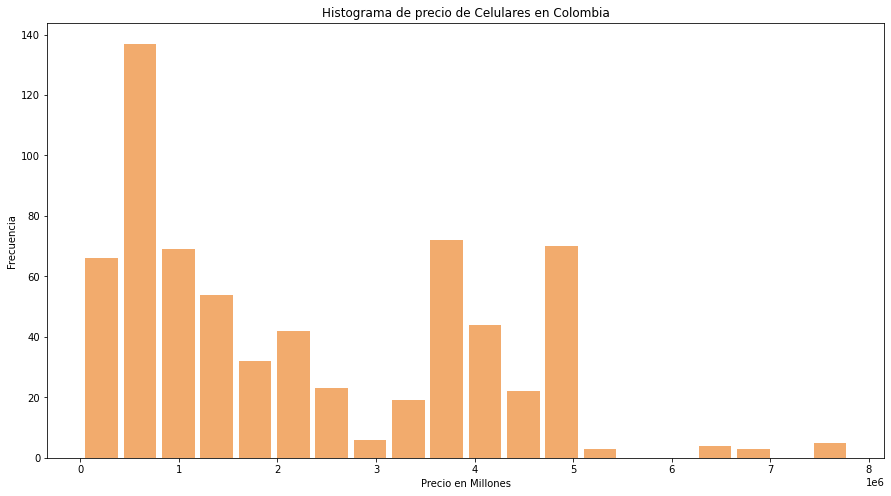

In [240]:
import matplotlib.pyplot as plot
import pandas as pd

celulares["precio"].plot.hist(bins=20, color='#F2AB6D', rwidth=0.85, figsize =(15,8)) 
plot.ylabel('Frecuencia')
plot.xlabel('Precio en Millones')
plot.title('Histograma de precio de Celulares en Colombia')
plot.show()

La distribucion de precios esta sesgada hacia la izquierda, existen celulares alrededor de los 4 millones de pesos y estos en su mayoria son los  de la marca de **Apple**

## ¿Cuales son los celulares más vendidos? (cantidades por marca y referencia)

In [242]:
celulares.marca.value_counts()*100/sum(celulares.marca.value_counts())

Apple              36.762481
Samsung            23.600605
Xiaomi             14.523449
Motorola            3.782148
Realme              3.025719
Sony                2.571861
Hyundai             2.269289
Huawei              2.118003
Tecno               2.118003
CAT                 0.907716
ZTE                 0.756430
Nokia               0.756430
Honor               0.756430
Vivo                0.605144
Krono               0.605144
Alcatel             0.605144
Mobulaa             0.453858
IPHONE              0.453858
iPhone              0.453858
LG                  0.302572
OnePlus             0.302572
Celular Xiaomi      0.302572
BLU                 0.302572
Infinix             0.302572
iPro                0.151286
Lenovo              0.151286
Xioami              0.151286
Movic               0.151286
Apple iPhone        0.151286
SANSUNG             0.151286
Uniwa               0.151286
Celular Alcatel     0.151286
Cocomii             0.151286
Name: marca, dtype: float64

In [338]:
df_marca=marca_rec.value_counts()*100/sum(marca_rec.value_counts())
df_marca

Apple           38.748137
Samsung         23.397914
Xiaomi          14.307004
Otras_Marcas    12.220566
Motorola         3.725782
Realme           2.980626
Sony             2.533532
Huawei           2.086438
Name: marca, dtype: float64

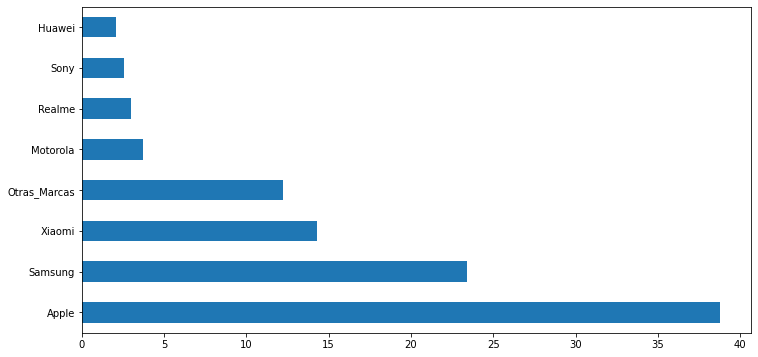

In [339]:
df_marca.plot(kind = 'barh', figsize = (12,6))

La mayor participacion por marca de celulares la tiene Apple con 38.74% seguido por Samsung con una participacion del 23.39%

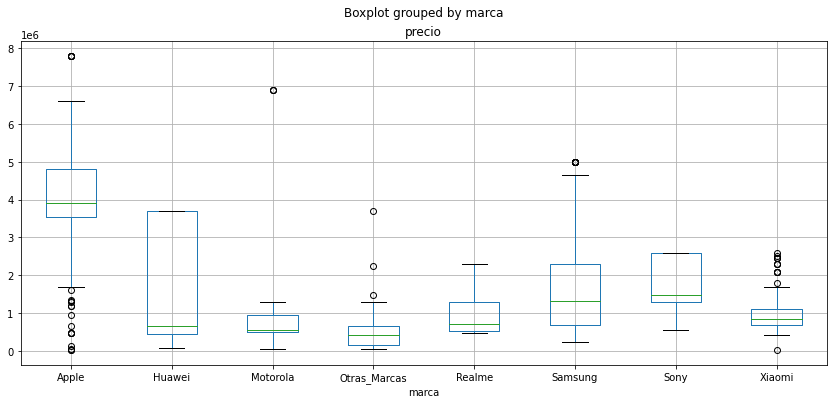

In [264]:
df.boxplot(column=['precio'],by="marca", figsize = (14,6))

EL grafico anterior muestra la dispersion que hay en el precio con respecto a cada marca, la marca Apple es la que presenta la mayor variabilidad y los precios son mas altos que el resto de marcas

In [195]:
celulares.modelo.value_counts()*100/sum(celulares.modelo.value_counts())

iPhone 12           12.658228
iPhone 12 Pro        7.911392
iPhone 12 mini       7.911392
iPhone SE            2.531646
Note 10              2.056962
                      ...    
A2                   0.158228
E6 Play Dual SIM     0.158228
Redmi 9A 32gb        0.158228
Blazing red          0.158228
A3 Lite Dual SIM     0.158228
Name: modelo, Length: 170, dtype: float64

La mayor participacion por referencia de celulares la tiene Apple con el iphone 12 con 12.65% y la referencia Iphone 12 Pro con 7.91%

## ¿Como es el consumo en celulares per cápita por cada uno de los departamentos del país ($/persona)?

In [265]:
depto.value_counts()*100/sum(depto.value_counts())

BogotáD.C.          76.208178
Antioquia           12.825279
Atlantico            2.416357
Cundinamarca         2.230483
Santander            2.044610
ValleDelCauca        1.486989
Amazonas             0.743494
Risaralda            0.371747
Caldas               0.371747
Boyaca               0.185874
Cauca                0.185874
Magdalena            0.185874
Caqueta              0.185874
Cesar                0.185874
BogotÃ¡D.C.          0.185874
NorteDeSantander     0.185874
Name: 1, dtype: float64

l consumo de celulares por departamento es mas alto en Bogota con un 76%. Esta cifra es sujeta al origen del vendedor del dispositivo por lo cual se pueden hacer envios a todo Colombia en la mayoria de los sitios de ventas de celulares. erl segundo departamento es Antioquia

In [306]:

df1=pd.concat([volumen_venta, depto, celulares["volumen1"]], axis=1)
df1.columns= ['volumen_venta','depto', 'volumen1']


## ($/persona)

In [305]:
df1.volumen_venta.groupby(df1["depto"]).sum()/df1.volumen1.groupby(df1["depto"]).sum()

depto
Amazonas                     NaN
Antioquia           6.650723e+05
Atlantico           1.504778e+05
BogotÃ¡D.C.                  NaN
BogotáD.C.          1.396711e+06
Boyaca              1.299000e+05
Caldas              1.111720e+06
Caqueta             1.300000e+06
Cauca                        NaN
Cesar               7.299000e+04
Cundinamarca        3.644900e+06
Magdalena           5.500000e+05
NorteDeSantander    5.500000e+05
Risaralda           5.500000e+05
Santander           6.271125e+05
ValleDelCauca       8.128058e+05
dtype: float64

El valor promedio percapita es de $1.396.711 para la ciudad de Bogota que es la que tiene mayor participacion

In [341]:
celulares.columns


Index(['calif', 'linea', 'marca', 'marca', 'memoriaInt', 'modelo', 'opiniones',
       'precio', 'tit_opinion', 'titulo', 'ubicacion', 'tipoventa', 'volumen1',
       'marca', 'marca'],
      dtype='object')

## ¿Y la Satisfaccion de los clientes ?

Se extrajo la calificacion que dan los clientes a cada dispositivo y se tiene lo siguiente

In [316]:
df2=pd.concat([marca_rec, depto, celulares["calif"]], axis=1)
df2.columns= ['marca','depto', 'calif']

In [319]:
df3=df2.calif.groupby(df2["marca"]).mean()
df3

marca
Apple           4.820385
Huawei          4.392857
Motorola        4.720000
Otras_Marcas    4.506098
Realme          4.790000
Samsung         4.721019
Sony            4.588235
Xiaomi          4.788542
Name: calif, dtype: float64

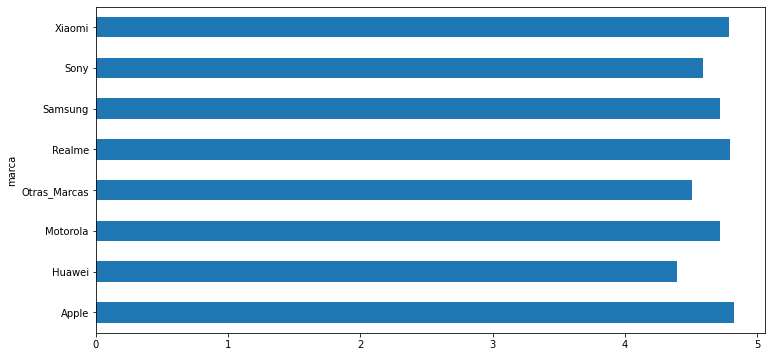

In [331]:
df3.plot(kind = 'barh', figsize = (12,6))

Apple tiene la calificacion mas alta con **4.82 de 5 estrellas**

## ¿Y la correlacion del precio ?

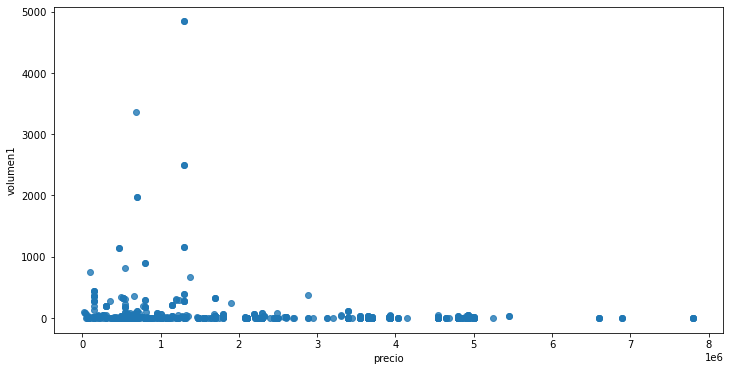

In [335]:
import matplotlib.pyplot as plt
from matplotlib import style

fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.scatter(x=celulares.precio, y=celulares.volumen1, alpha= 0.8)
ax.set_xlabel('precio')
ax.set_ylabel('volumen1');

In [334]:
print('Correlación Pearson: ', celulares['precio'].corr(celulares['volumen1'], method='pearson'))
print('Correlación spearman: ', celulares['precio'].corr(celulares['volumen1'], method='spearman'))
print('Correlación kendall: ', celulares['precio'].corr(celulares['volumen1'], method='kendall'))

Correlación Pearson:  -0.1437375608211268
Correlación spearman:  -0.13673271127649989
Correlación kendall:  -0.0906722251109471


La correlacion del precio con respecto al volumen de ventas es bajo, la correlacion lineal es negativa, con lo cual entre mas grande sea el precio el nivel de ventas tiende a bajar

## Recomendaciones